# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

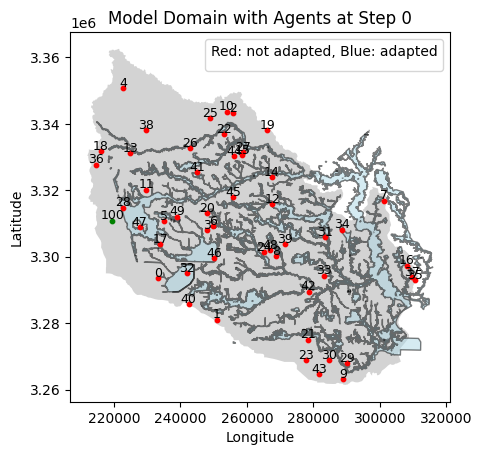

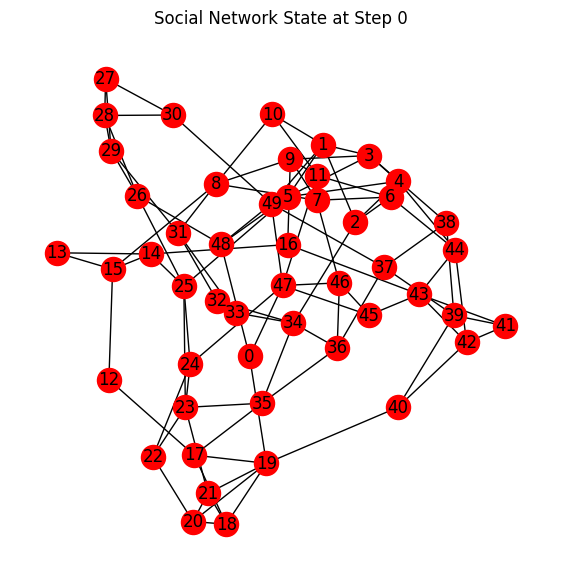

27025.355823249593
Hi, I am agent 16.
Hi, I am agent 27.
Hi, I am agent 20.
Hi, I am agent 13.
Hi, I am agent 12.
Hi, I am agent 15.
Hi, I am agent 28.
Hi, I am agent 23.
Hi, I am agent 25.
Hi, I am agent 38.
Hi, I am agent 6.
Hi, I am agent 30.
Hi, I am agent 2.
Hi, I am agent 9.
Hi, I am agent 29.
Hi, I am agent 17.
Hi, I am agent 19.
Hi, I am agent 45.
Hi, I am agent 0.
Hi, I am agent 1.
Hi, I am agent 26.
Hi, I am agent 4.
Hi, I am agent 22.
Hi, I am agent 3.
Hi, I am agent 39.
Hi, I am agent 40.
Hi, I am agent 7.
Hi, I am agent 21.
Hi, I am agent 37.
Hi, I am agent 48.
Hi, I am agent 41.
Hi, I am agent 11.
Hi, I am agent 31.
Hi, I am agent 44.
Hi, I am agent 42.
Hi, I am agent 5.
Hi, I am agent 35.
Hi, I am agent 33.
Hi, I am agent 43.
Hi, I am agent 24.
Hi, I am agent 18.
Hi, I am agent 46.
Hi, I am agent 49.
Hi, I am agent 47.
Hi, I am agent 34.
Hi, I am agent 32.
Hi, I am agent 14.
Hi, I am agent 8.
Hi, I am agent 36.
Hi, I am agent 10.
53315.338874796464
Hi, I am agent 41.
Hi,

<Figure size 1000x600 with 0 Axes>

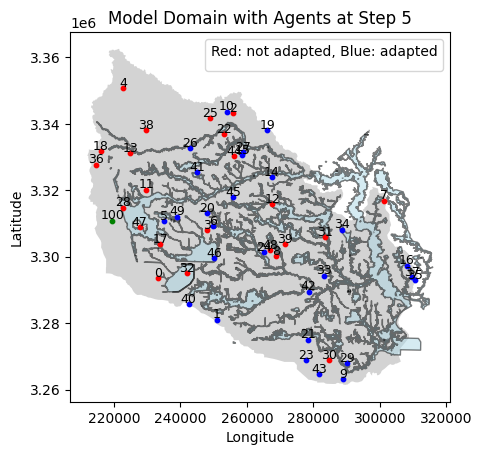

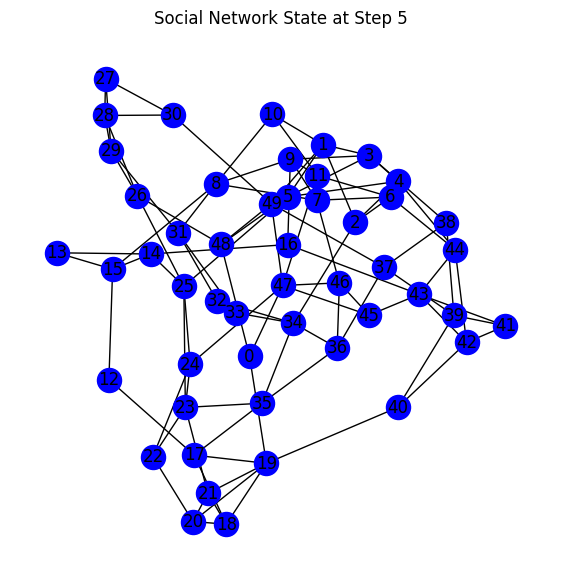

159093.8754343038
Hi, I am agent 32.
Hi, I am agent 27.
Hi, I am agent 28.
Hi, I am agent 33.
Hi, I am agent 31.
Hi, I am agent 36.
Hi, I am agent 46.
Hi, I am agent 40.
Hi, I am agent 22.
Hi, I am agent 48.
Hi, I am agent 14.
Hi, I am agent 20.
Hi, I am agent 47.
Hi, I am agent 24.
Hi, I am agent 12.
Hi, I am agent 45.
Hi, I am agent 15.
Hi, I am agent 49.
Hi, I am agent 41.
Hi, I am agent 30.
Hi, I am agent 8.
Hi, I am agent 29.
Hi, I am agent 19.
Hi, I am agent 21.
Hi, I am agent 37.
Hi, I am agent 1.
Hi, I am agent 5.
Hi, I am agent 34.
Hi, I am agent 3.
Hi, I am agent 7.
Hi, I am agent 43.
Hi, I am agent 4.
Hi, I am agent 44.
Hi, I am agent 23.
Hi, I am agent 6.
Hi, I am agent 26.
Hi, I am agent 13.
Hi, I am agent 9.
Hi, I am agent 38.
Hi, I am agent 10.
Hi, I am agent 16.
Hi, I am agent 25.
Hi, I am agent 42.
Hi, I am agent 39.
Hi, I am agent 0.
Hi, I am agent 2.
Hi, I am agent 18.
Hi, I am agent 17.
Hi, I am agent 35.
Hi, I am agent 11.
185576.7160402447
Hi, I am agent 37.
Hi, I

<Figure size 1000x600 with 0 Axes>

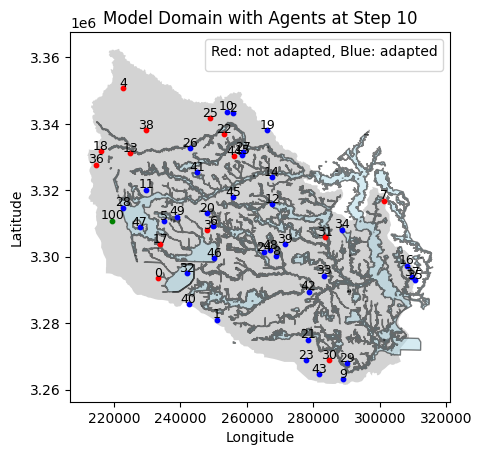

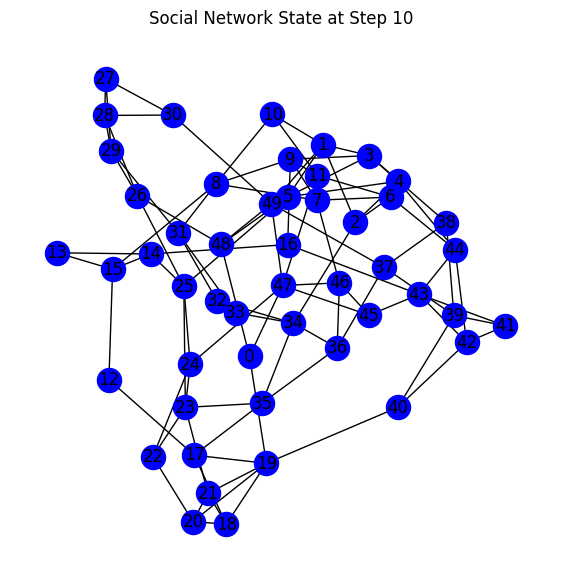

292108.3524927189
Hi, I am agent 11.
Hi, I am agent 30.
Hi, I am agent 3.
Hi, I am agent 18.
Hi, I am agent 44.
Hi, I am agent 15.
Hi, I am agent 43.
Hi, I am agent 2.
Hi, I am agent 24.
Hi, I am agent 17.
Hi, I am agent 31.
Hi, I am agent 4.
Hi, I am agent 21.
Hi, I am agent 46.
Hi, I am agent 47.
Hi, I am agent 22.
Hi, I am agent 13.
Hi, I am agent 45.
Hi, I am agent 16.
Hi, I am agent 34.
Hi, I am agent 7.
Hi, I am agent 36.
Hi, I am agent 33.
Hi, I am agent 9.
Hi, I am agent 6.
Hi, I am agent 19.
Hi, I am agent 27.
Hi, I am agent 12.
Hi, I am agent 14.
Hi, I am agent 8.
Hi, I am agent 39.
Hi, I am agent 28.
Hi, I am agent 35.
Hi, I am agent 26.
Hi, I am agent 41.
Hi, I am agent 48.
Hi, I am agent 37.
Hi, I am agent 25.
Hi, I am agent 0.
Hi, I am agent 38.
Hi, I am agent 5.
Hi, I am agent 42.
Hi, I am agent 10.
Hi, I am agent 32.
Hi, I am agent 20.
Hi, I am agent 29.
Hi, I am agent 23.
Hi, I am agent 49.
Hi, I am agent 1.
Hi, I am agent 40.
318730.09672218235
Hi, I am agent 43.
Hi, 

<Figure size 1000x600 with 0 Axes>

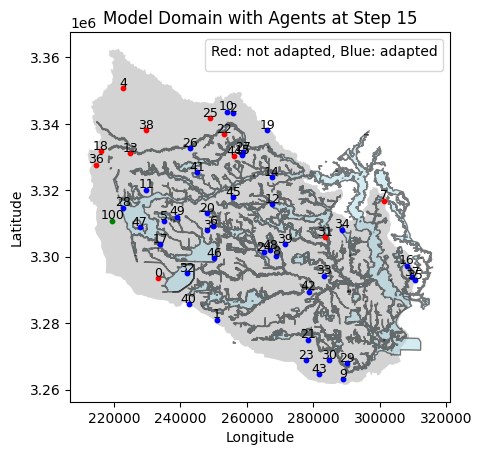

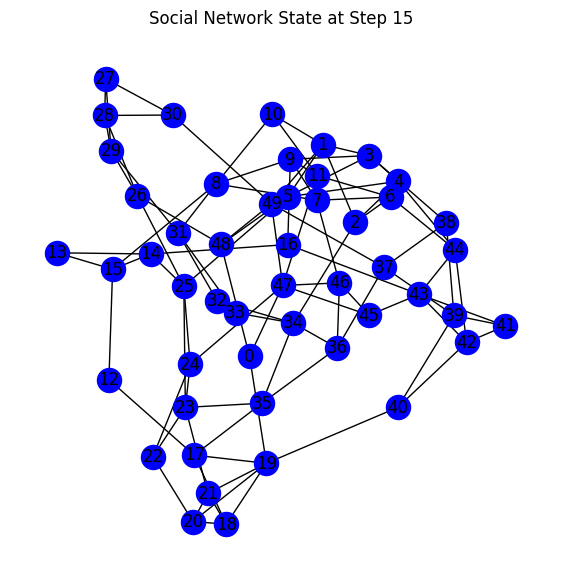

424694.964246801
Hi, I am agent 16.
Hi, I am agent 48.
Hi, I am agent 34.
Hi, I am agent 9.
Hi, I am agent 29.
Hi, I am agent 21.
Hi, I am agent 49.
Hi, I am agent 2.
Hi, I am agent 10.
Hi, I am agent 28.
Hi, I am agent 0.
Hi, I am agent 6.
Hi, I am agent 40.
Hi, I am agent 7.
Hi, I am agent 11.
Hi, I am agent 37.
Hi, I am agent 47.
Hi, I am agent 3.
Hi, I am agent 1.
Hi, I am agent 8.
Hi, I am agent 12.
Hi, I am agent 26.
Hi, I am agent 19.
Hi, I am agent 33.
Hi, I am agent 43.
Hi, I am agent 22.
Hi, I am agent 17.
Hi, I am agent 25.
Hi, I am agent 39.
Hi, I am agent 4.
Hi, I am agent 18.
Hi, I am agent 14.
Hi, I am agent 42.
Hi, I am agent 13.
Hi, I am agent 20.
Hi, I am agent 45.
Hi, I am agent 30.
Hi, I am agent 32.
Hi, I am agent 41.
Hi, I am agent 5.
Hi, I am agent 46.
Hi, I am agent 36.
Hi, I am agent 27.
Hi, I am agent 23.
Hi, I am agent 31.
Hi, I am agent 15.
Hi, I am agent 38.
Hi, I am agent 44.
Hi, I am agent 35.
Hi, I am agent 24.
451718.82117386314
Hi, I am agent 41.
Hi, I

<Figure size 1000x600 with 0 Axes>

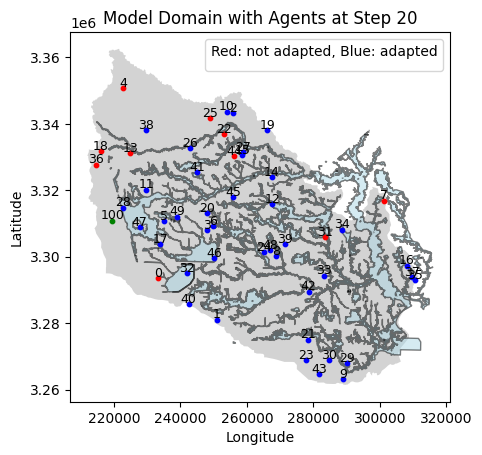

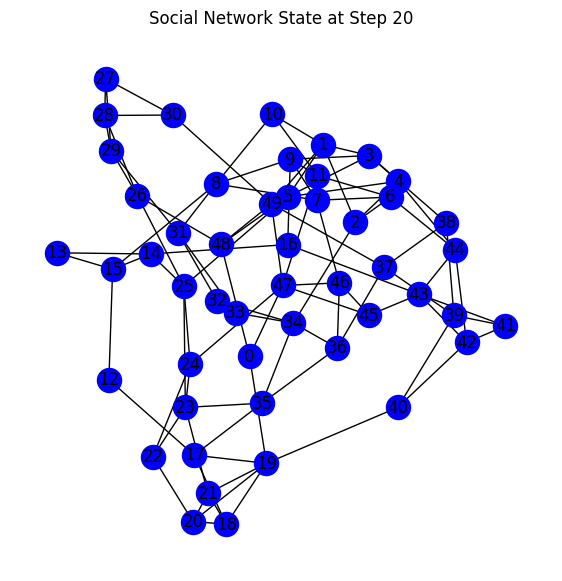

In [1]:
from model import AdaptationModel
from agents import Government, Households
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    for agent in model.schedule.agents:
        if isinstance(agent, Households):
            colors = 'blue' if agent.is_adapted else 'red' 
        # elif isinstance(agent, Government):
        #     colors = 'green'
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data


FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.000000              0.000000          0.000000   
     1                   0.592775              0.556995          0.577480   
     2                   2.319450              0.795196          1.800259   
     3                   0.428669              0.500402          0.348135   
     4                   0.000000              0.000000          0.000000   
...                           ...                   ...               ...   
19   46                  4.241726              0.900592          3.472656   
     47                  0.399921              0.488281          0.443740   
     48                  0.640644              0.570554          0.499285   
     49                  0.245876              0.403349          0.208163   
     100                      NaN                   NaN               NaN   

              FloodDamageActual IsAdapted  FriendsCount  \
Step AgentID                                              
0    0                 0.000000     False           3.0   
     1                 0.552430     False           5.0   
     2                 0.750953     False           4.0   
     3                 0.464068     False           5.0   
     4                 0.000000     False           5.0   
...                         ...       ...           ...   
19   46                0.865663      True           4.0   
     47                0.506435      True           6.0   
     48                0.527027      True           4.0   
     49                0.374277      True           5.0   
     100                    NaN      None           NaN   

                                                   location  
Step AgentID                                                 
0    0        POINT (233385.30900235721 3293597.8649709527)  
     1         POINT (250919.36428443145 3281118.781148154)  
     2         POINT (255872.55320728096 3343298.573818912)  
     3          POINT (247891.06498462526 3308065.47097936)  
     4          POINT (222691.73149973512 3350857.60482648)  
...                                                     ...  
19   46        POINT (250240.92329435417 3299613.058464316)  
     47        POINT (227680.98271859708 3308991.615265337)  
     48        POINT (267059.7647603477 3302087.1978051555)  
     49         POINT (238902.985080883 3312083.4607057828)  
     100       POINT (219504.7842003262 3310886.0483286385)  

[1020 rows x 7 columns]

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,9
2,15
3,17
4,24
5,27
6,31
7,32
8,34
9,34
